In [3]:
# only for taurus
import os
print(os.getcwd())
os.chdir("model_development/notebooks")
print(os.getcwd())

/data/horse/ws/jori152b-medinf/KP_MedInf
/data/horse/ws/jori152b-medinf/KP_MedInf/model_development/notebooks


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [43]:
df = pd.read_csv('../data/analysis/data_preprocessed_extended_before_resampling.csv', parse_dates=['charttime'])

In [38]:
x1 = pd.read_csv('../data/preprocessed/preprocessed_data_extended_6H.csv', parse_dates=['charttime'])
# x2 = pd.read_csv('../data/preprocessed/preprocessed_data.csv', parse_dates=['charttime'])

In [6]:
print(x1.columns)
print(x2.columns)

Index(['icustay_id', 'charttime', 'albumin_mean', 'aniongap_mean',
       'bands_mean', 'bicarbonate_mean', 'bilirubin_mean', 'bun_mean',
       'calcium', 'calcium_mean', 'chloride_mean', 'creat', 'creatinine_mean',
       'diasbp_mean', 'glucose_mean_x', 'glucose_mean_y', 'heartrate_mean',
       'hematocrit_mean', 'hemoglobin_mean', 'inr_mean', 'lactate_mean',
       'meanbp_mean', 'phosphate_mean', 'platelet_mean', 'potassium_mean',
       'pt_mean', 'ptt_mean', 'resprate_mean', 'sodium_mean', 'spo2_mean',
       'subject_id', 'sysbp_mean', 'tempc_mean', 'uo_rt_12hr', 'uo_rt_24hr',
       'uo_rt_6hr', 'uric_acid_mean', 'wbc_mean', 'sedative', 'vasopressor',
       'vent', 'hadm_id', 'aki_stage', 'admission_age', 'gender_F', 'gender_M',
       'ethnicity_grouped_asian', 'ethnicity_grouped_black',
       'ethnicity_grouped_hispanic', 'ethnicity_grouped_native',
       'ethnicity_grouped_other', 'ethnicity_grouped_unknown',
       'ethnicity_grouped_white', 'weight_first', 'height_fir

In [17]:
# get the difference in columns between x1 and x2
print(x1.columns.difference(x2.columns))

Index(['albumin_mean', 'bands_mean', 'bilirubin_mean', 'calcium',
       'calcium_mean', 'inr_mean', 'lactate_mean', 'phosphate_mean',
       'platelet_mean', 'pt_mean', 'ptt_mean', 'uric_acid_mean'],
      dtype='object')


In [ ]:
stats = df.describe()
print(stats)    
# save to csv
stats.to_csv('../data/analysis/data_preprocessed_extended_stats.csv', index=False)

In [44]:
# Initialize a dictionary to store results
results = {}

# List of columns to analyze (excluding the datetime and other non-measurement columns)
columns_to_analyze = df.columns.difference(['icustay_id', 'charttime', 'hadm_id', 'subject_id'])

# Group by icustay_id
grouped = df.groupby('icustay_id')

# Iterate through each column to analyze
for column in columns_to_analyze:
    frequencies = []
    mean_time_diffs = []
    std_time_diffs = []
    max_time_diffs = []
    min_time_diffs = []

    # Iterate through each group (each icustay_id)
    for icustay_id, group in grouped:
        valid_rows = group[group[column].notna()]

        frequency = valid_rows.shape[0]
        if frequency > 1:
            time_diffs = valid_rows['charttime'].diff().dropna().dt.total_seconds() / 60  # in minutes

            mean_time_diff = time_diffs.mean()
            std_time_diff = time_diffs.std()
            max_time_diff = time_diffs.max()
            min_time_diff = time_diffs.min()
        else:
            mean_time_diff = std_time_diff = max_time_diff = min_time_diff = None

        frequencies.append(frequency)
        mean_time_diffs.append(mean_time_diff)
        std_time_diffs.append(std_time_diff)
        max_time_diffs.append(max_time_diff)
        min_time_diffs.append(min_time_diff)

    # Aggregate the statistics across all icustay_id groups
    overall_frequency = sum(frequencies)
    overall_mean_time_diff = pd.Series(mean_time_diffs).mean()
    overall_std_time_diff = pd.Series(std_time_diffs).mean()
    overall_max_time_diff = pd.Series(max_time_diffs).max()
    overall_min_time_diff = pd.Series(min_time_diffs).min()

    results[column] = {
        'frequency': overall_frequency,
        'mean_time_diff': overall_mean_time_diff,
        'std_time_diff': overall_std_time_diff,
        'max_time_diff': overall_max_time_diff,
        'min_time_diff': overall_min_time_diff
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('../data/analysis/measurement_statistics_by_icustay.csv')


                   frequency  mean_time_diff  std_time_diff  max_time_diff  \
aki_stage          3737147.0      268.196204     318.170355       151560.0   
albumin_mean        127144.0     4733.292976    3480.603919       147247.0   
aniongap_mean       727962.0     1303.597024     679.459764       152630.0   
bands_mean           32269.0     6547.074375    6204.855575       196948.0   
bicarbonate_mean    739479.0     1269.780570     670.053927       152630.0   
bilirubin_mean      211966.0     3309.854327    2319.290108       147247.0   
bun_mean            739446.0     1256.736099     622.569067       143305.0   
calcium              91775.0      284.826021     154.363747         1735.0   
calcium_mean        588514.0     1635.787266     848.741967        98805.0   
chloride_mean       807392.0     1163.984827     688.602992       152630.0   
creat               386396.0     1116.876073     497.785478         9470.0   
creatinine_mean     741939.0     1249.476617     621.337151     

In [ ]:
# visualize the measurement_statistics_by_icustay



In [ ]:
# drop all the columns in string format
X.drop(['first_hosp_stay'], axis=1, inplace = True)
X.drop(['first_icu_stay'], axis=1, inplace = True)
X.drop(['ethnicity'], axis=1, inplace = True)
X.drop(['admittime'], axis=1, inplace = True)
X.drop(['dischtime'], axis=1, inplace = True)
X.drop(['intime'], axis=1, inplace = True)
X.drop(['outtime'], axis=1, inplace = True)
X.drop(['dod'], axis=1, inplace = True)
X.drop(['charttime'], axis=1, inplace = True)


In [41]:
X = x1

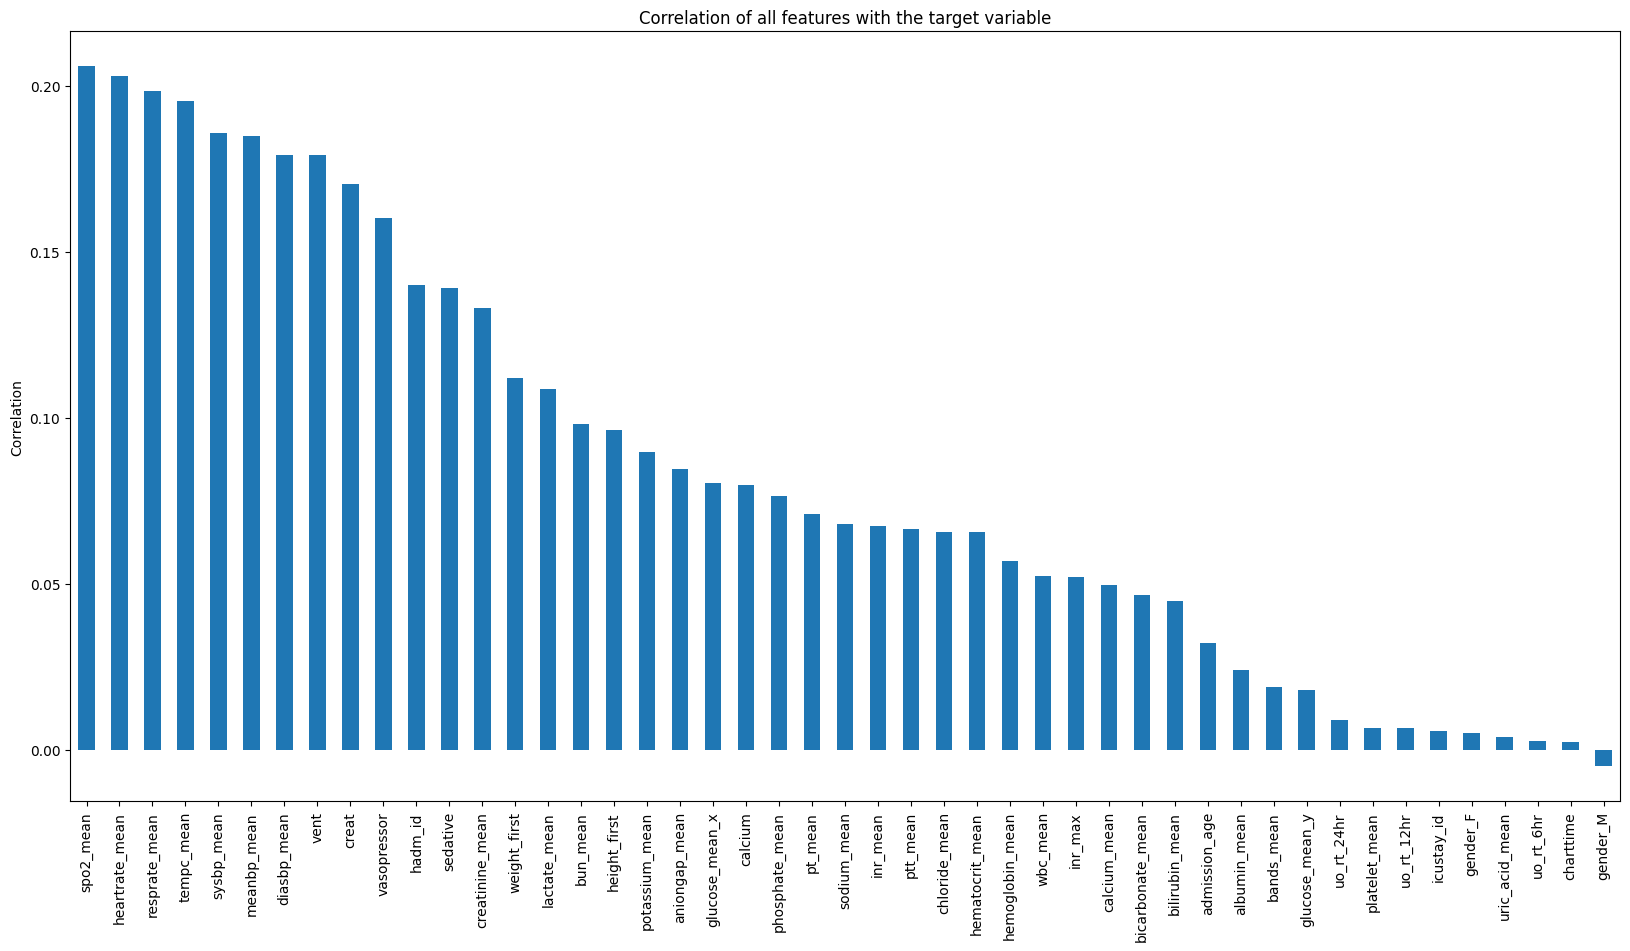

<Figure size 640x480 with 0 Axes>

In [42]:
# Calculate correlations
correlations = X.corr()['aki_stage'].drop('aki_stage').sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(20,10))
correlations.plot(kind='bar')
plt.title('Correlation of all features with the target variable')
plt.ylabel('Correlation')
plt.show()
# save plot
plt.savefig('../data/analysis/figures/correlations_1H.png')

In [ ]:
# calculate the frequency of each attribute, i.e. the distribution of non nan values
X.apply(lambda x: x.count(), axis=0)

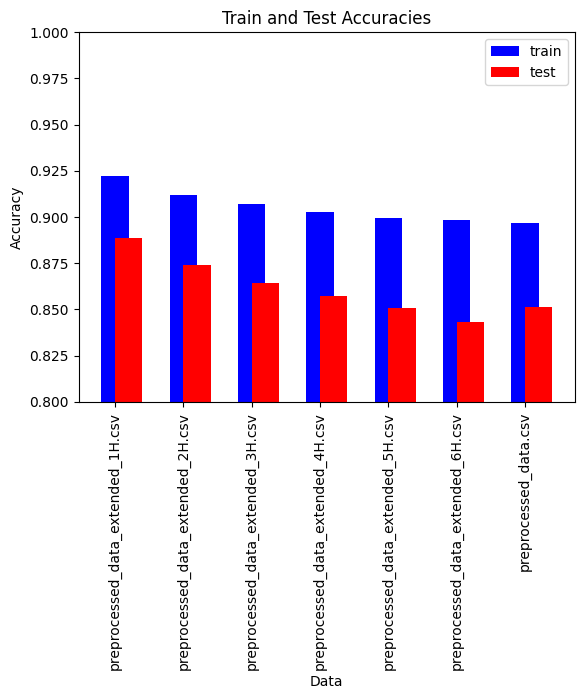

<Figure size 640x480 with 0 Axes>

In [37]:
# load results dict from f'data/results.npy'
results = np.load('data/results.npy', allow_pickle=True).item()

# Extract train and test accuracies
train_accuracies = [v['train_accuracy'] for v in results.values()]
test_accuracies = [v['test_accuracy'] for v in results.values()]

# Create bar plot
x = range(len(results))
plt.bar(x, train_accuracies, width=0.4, label='train', color='b', align='center')
plt.bar(x, test_accuracies, width=0.4, label='test', color='r', align='edge')

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies')
plt.xticks(x, results.keys(), rotation='vertical')
plt.legend()

# Set y-axis limits
plt.ylim([0.8, 1.0])

# Show plot
plt.show()

# save plot
plt.savefig('../data/analysis/figures/train_test_accuracies.png')

In [7]:
print(results)

{'preprocessed_data.csv': {'fold_results': [{'fold': 1, 'train_accuracy': 0.8966869979767361, 'val_accuracy': 0.8525306099749149, 'train_roc_auc': np.float64(0.8996531882153412), 'val_roc_auc': np.float64(0.7319682783524395), 'train_pr_auc': np.float64(0.7311389206090996), 'val_pr_auc': np.float64(0.422542512113768)}, {'fold': 2, 'train_accuracy': 0.8965503030517116, 'val_accuracy': 0.8525301204819277, 'train_roc_auc': np.float64(0.8996449802616172), 'val_roc_auc': np.float64(0.7296862036111936), 'train_pr_auc': np.float64(0.7306526771056957), 'val_pr_auc': np.float64(0.41465486860600964)}, {'fold': 3, 'train_accuracy': 0.8968014394706157, 'val_accuracy': 0.8498261116694159, 'train_roc_auc': np.float64(0.9011306088480089), 'val_roc_auc': np.float64(0.7427822217569302), 'train_pr_auc': np.float64(0.7319003251425221), 'val_pr_auc': np.float64(0.4271609335796651)}, {'fold': 4, 'train_accuracy': 0.896443597476364, 'val_accuracy': 0.8501144298700006, 'train_roc_auc': np.float64(0.8998939925

In [6]:
results = np.load('data/comparison_time_bins_results_cross_validated.npy', allow_pickle=True).item()

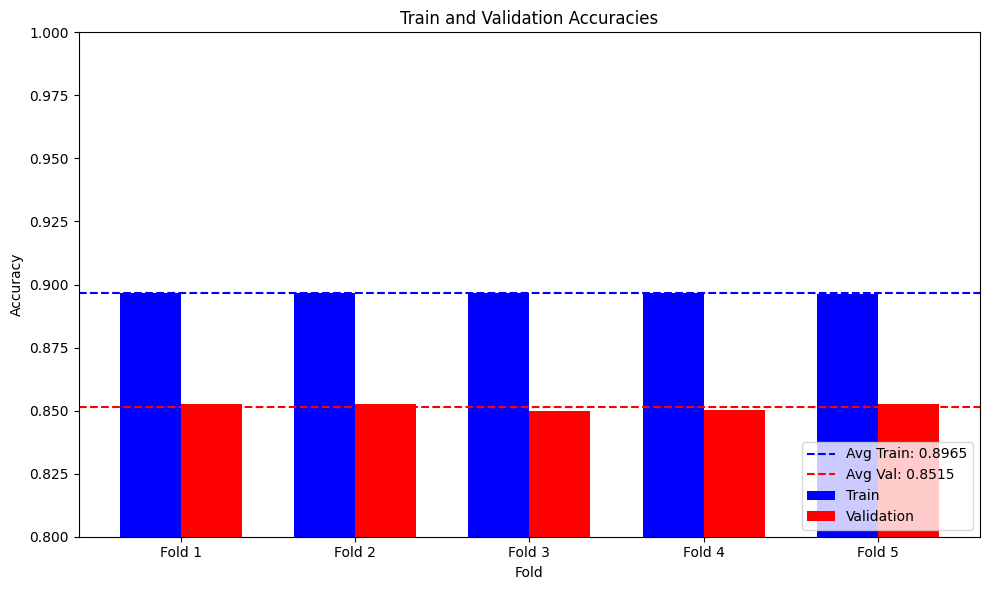

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Your data

# Extract train and validation accuracies
train_accuracies = [fold['train_accuracy'] for fold in results['preprocessed_data.csv']['fold_results']]
val_accuracies = [fold['val_accuracy'] for fold in results['preprocessed_data.csv']['fold_results']]

# Create bar plot
x = range(len(train_accuracies))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, train_accuracies, width, label='Train', color='b', align='center')
ax.bar([i + width for i in x], val_accuracies, width, label='Validation', color='r', align='center')

# Add labels and title
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Validation Accuracies')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels([f'Fold {i+1}' for i in x])
ax.legend()

# Set y-axis limits
ax.set_ylim([0.8, 1.0])

# Add average line
avg_train = results['preprocessed_data.csv']['average_scores']['train_accuracy']
avg_val = results['preprocessed_data.csv']['average_scores']['val_accuracy']
ax.axhline(y=avg_train, color='b', linestyle='--', label=f'Avg Train: {avg_train:.4f}')
ax.axhline(y=avg_val, color='r', linestyle='--', label=f'Avg Val: {avg_val:.4f}')

# Adjust legend
ax.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.show()

# Save plot
plt.savefig('train_val_accuracies.png')